In [5]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [32]:
base_folder_path = '../HO_results'

asset = "HO-5minHLV"
pattern = f"{base_folder_path}/{asset}*"
out_samples = glob.glob(pattern)

In [33]:
out_samples

['../HO_results/HO-5minHLV_INSAMP_10_OUTSAMP_1_',
 '../HO_results/HO-5minHLV_INSAMP_4_OUTSAMP_3_',
 '../HO_results/HO-5minHLV_INSAMP_2_OUTSAMP_1_',
 '../HO_results/HO-5minHLV_INSAMP_1_OUTSAMP_3_',
 '../HO_results/HO-5minHLV_INSAMP_2_OUTSAMP_2_',
 '../HO_results/HO-5minHLV_INSAMP_5_OUTSAMP_2_',
 '../HO_results/HO-5minHLV_INSAMP_5_OUTSAMP_1_',
 '../HO_results/HO-5minHLV_INSAMP_3_OUTSAMP_1_',
 '../HO_results/HO-5minHLV_INSAMP_3_OUTSAMP_2_',
 '../HO_results/HO-5minHLV_INSAMP_1_OUTSAMP_6_',
 '../HO_results/HO-5minHLV_INSAMP_5_OUTSAMP_3_',
 '../HO_results/HO-5minHLV_INSAMP_1_OUTSAMP_1_',
 '../HO_results/HO-5minHLV_INSAMP_1_OUTSAMP_2_',
 '../HO_results/HO-5minHLV_INSAMP_4_OUTSAMP_2_',
 '../HO_results/HO-5minHLV_INSAMP_4_OUTSAMP_1_']

In [38]:
def process_csv_files(csv_files):

    df_combined = pd.DataFrame()

    for file in csv_files:
        df = pd.read_csv(file)
        df['YYYY'] = df['YYYY'].astype(str)
        df['MM'] = df['MM'].apply(lambda x: f"{x:02d}")
        df['DD'] = df['DD'].apply(lambda x: f"{x:02d}")
        df['hh'] = df['hh'].apply(lambda x: f"{x:02d}")
        df['mm'] = df['mm'].apply(lambda x: f"{x:02d}")
        df['timestamp'] = pd.to_datetime(df['YYYY'] + '-' + df['MM'] + '-' + df['DD'] + ' ' + df['hh'] + ':' + df['mm'])
        df = df.drop(columns=['YYYY', 'MM', 'DD', 'hh', 'mm'])

        df['net equity'] = df['Equity'].diff().fillna(0)
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    
    
    # print(df_combined.head())
    df_combined = df_combined.sort_values(by='timestamp')
    df_combined['actual equity'] = df_combined['Equity']
    df_copy = df_combined.copy()
    df_copy.loc[1:, 'actual equity'] = df_combined['net equity'][1:].cumsum() + df_combined['Equity'].iloc[0]
    df_copy.set_index('timestamp', inplace=True)
    #print(file)

    return df_copy

In [40]:
dfs_combined = {}

for sample in out_samples:
    folder_path = os.path.join(sample, 'outsample')
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
    if len(csv_files) != 0:
        dfs_combined[sample] = process_csv_files(csv_files)
    else: 
        print(folder_path)

/var/folders/4s/kkf94s7s013511xsv5c9mznc0000gn/T/ipykernel_90535/2959161494.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, df], ignore_index=True)
/var/folders/4s/kkf94s7s013511xsv5c9mznc0000gn/T/ipykernel_90535/2959161494.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, df], ignore_index=True)


../HO_results/HO-5minHLV_INSAMP_2_OUTSAMP_1_/outsample
../HO_results/HO-5minHLV_INSAMP_2_OUTSAMP_2_/outsample


/var/folders/4s/kkf94s7s013511xsv5c9mznc0000gn/T/ipykernel_90535/2959161494.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, df], ignore_index=True)
/var/folders/4s/kkf94s7s013511xsv5c9mznc0000gn/T/ipykernel_90535/2959161494.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, df], ignore_index=True)
/var/folders/4s/kkf94s7s013511xsv5c9mznc0000gn/T/ipykernel_90535/2959161494.py:16: FutureWarning: The behavior of Data

../HO_results/HO-5minHLV_INSAMP_1_OUTSAMP_6_/outsample
../HO_results/HO-5minHLV_INSAMP_5_OUTSAMP_3_/outsample
../HO_results/HO-5minHLV_INSAMP_4_OUTSAMP_2_/outsample


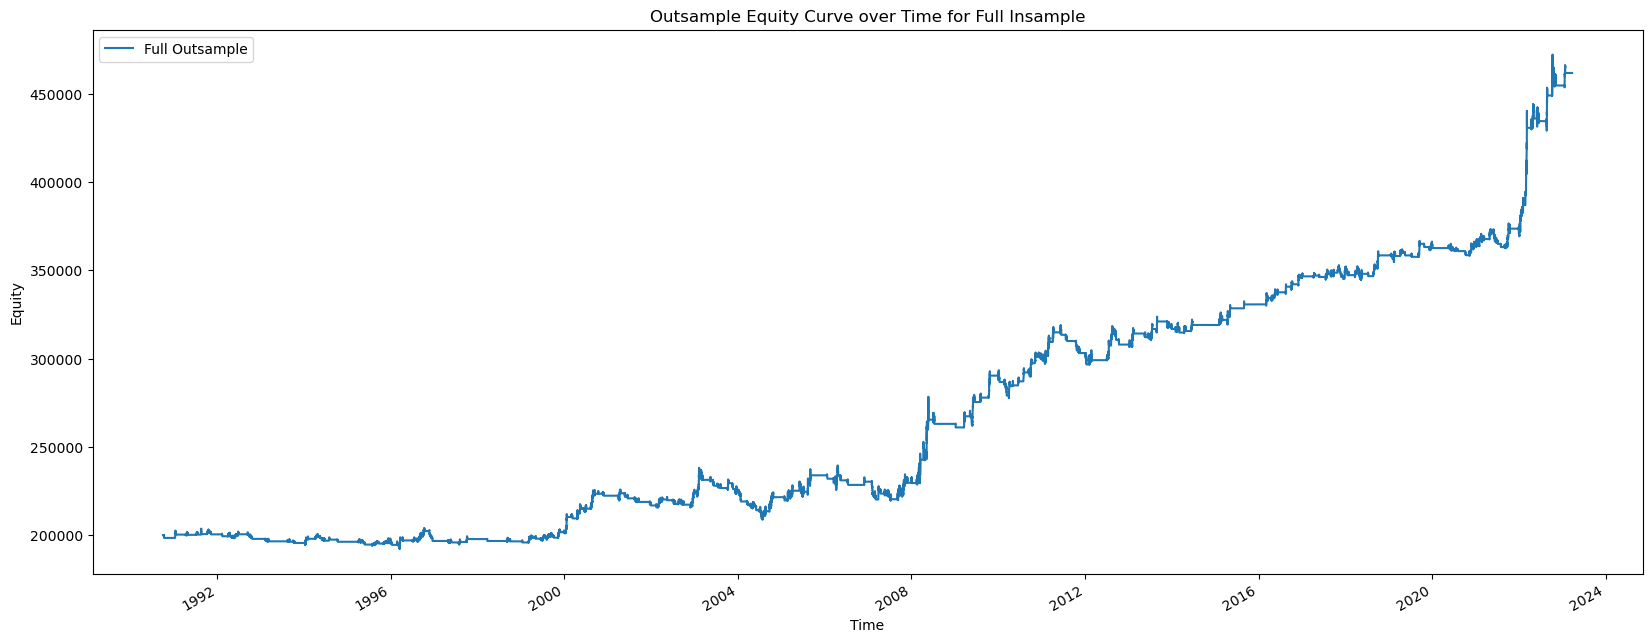

In [6]:
df_full = process_csv_files("../data/HO-5minHLV_FULL_INSAMP_FULL_OUTSAMP_/outsample")
plt.figure(figsize=(20, 8))
df_full['actual equity'].plot(label='Full Outsample')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.title(f'Outsample Equity Curve over Time for Full Insample')
plt.legend()
plt.show()

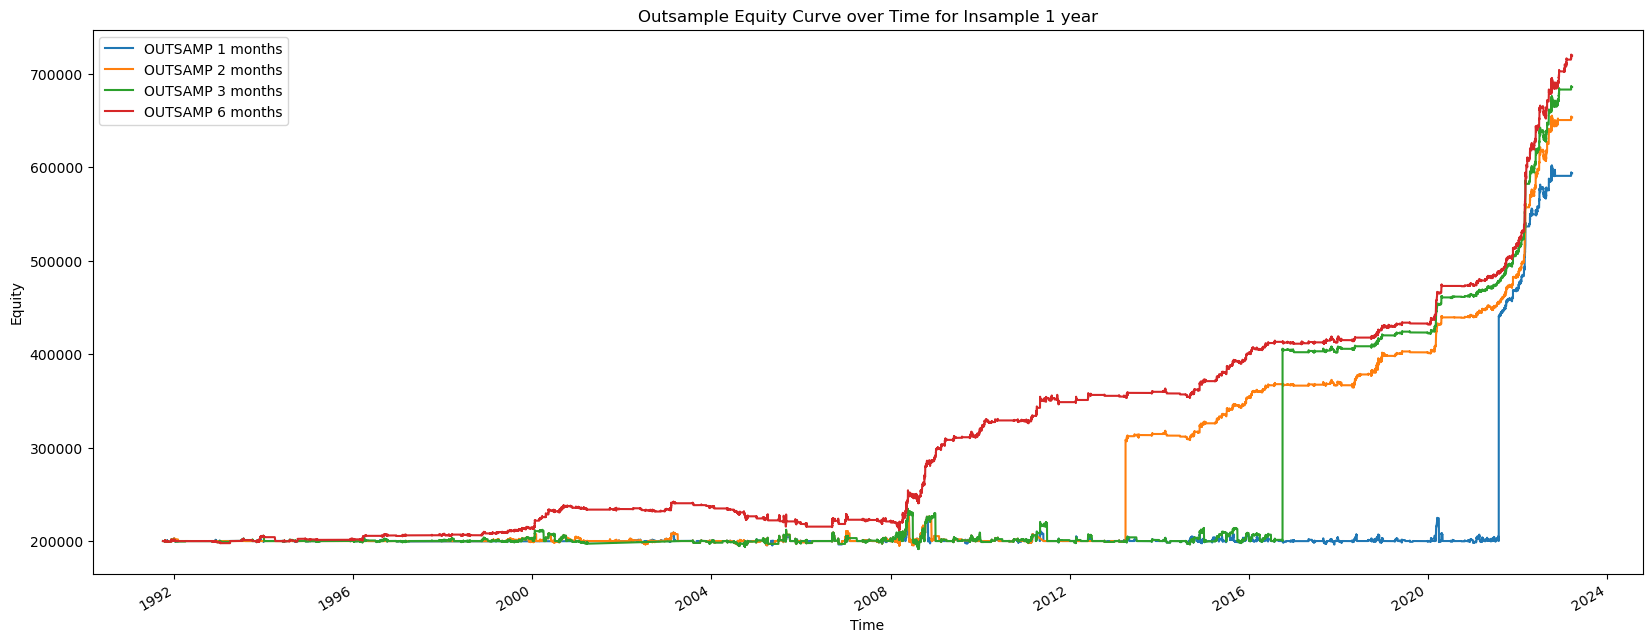

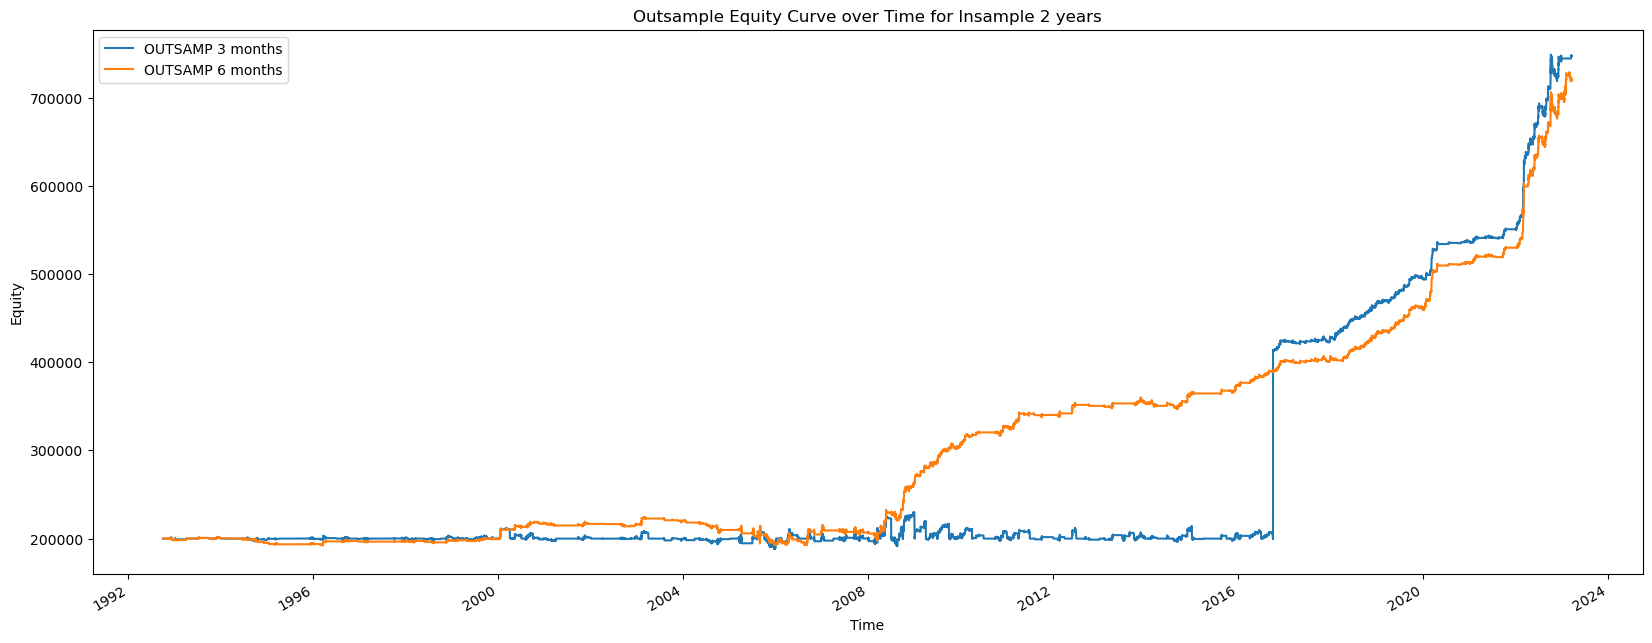

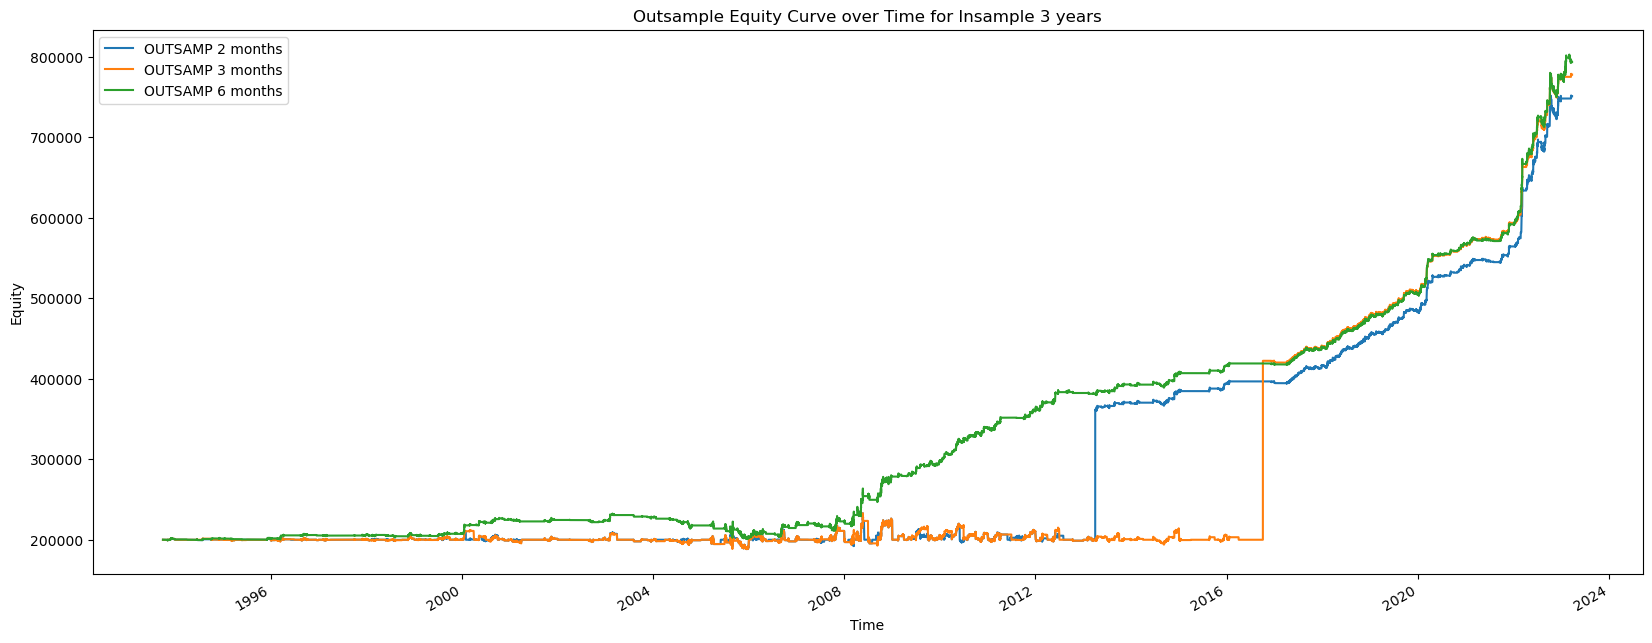

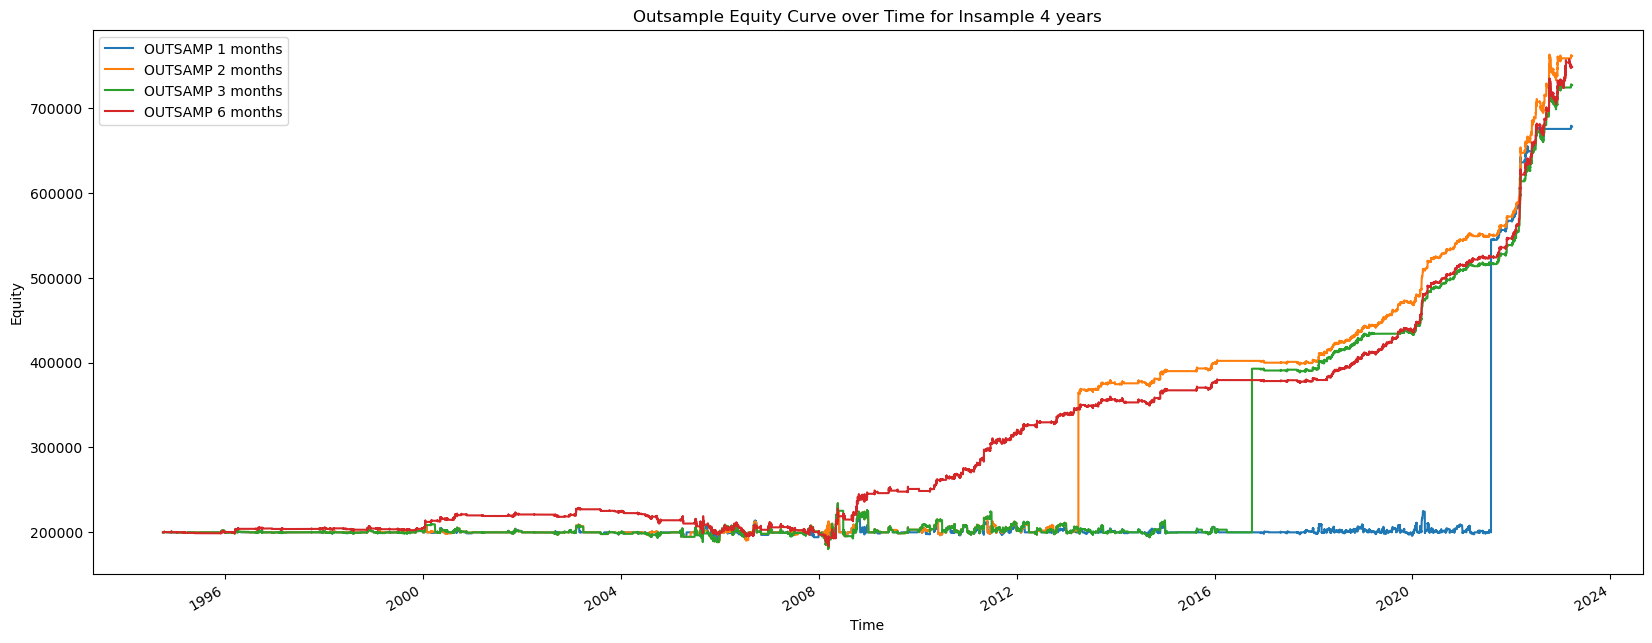

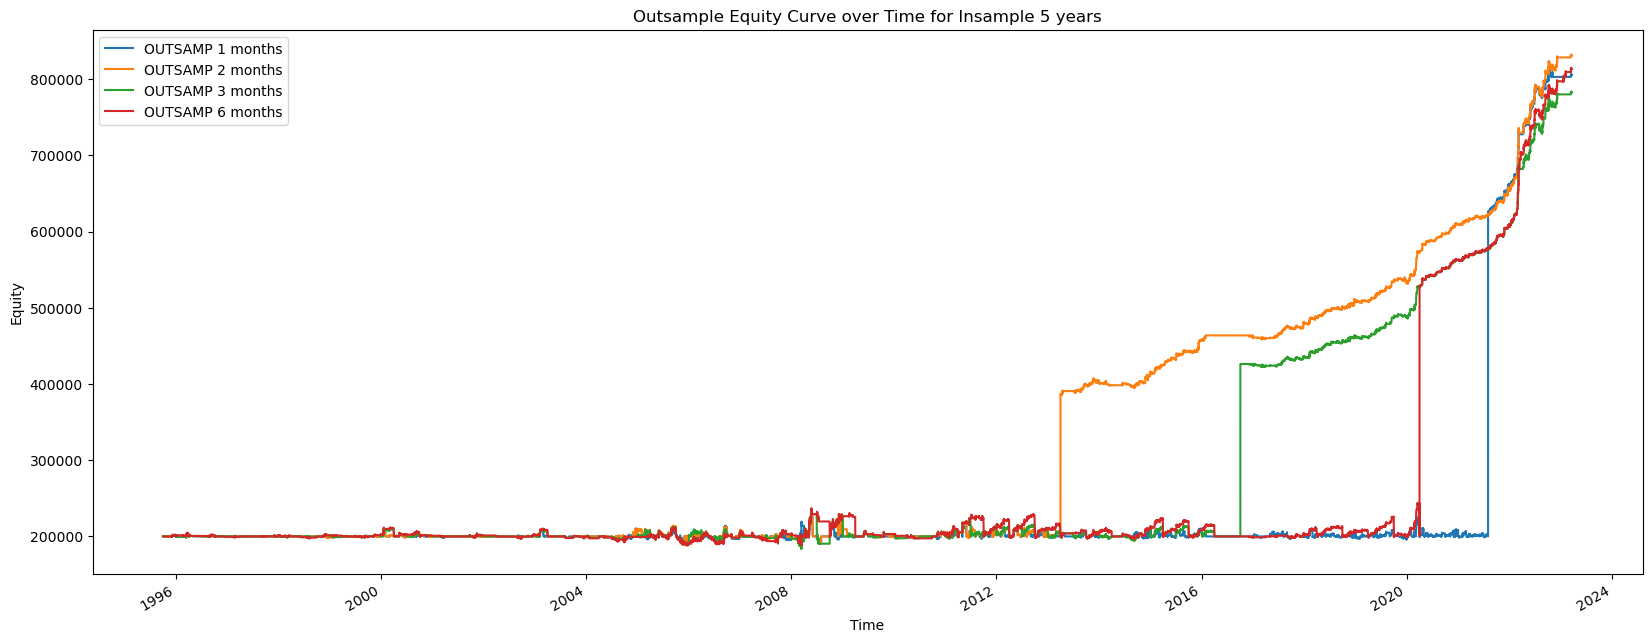

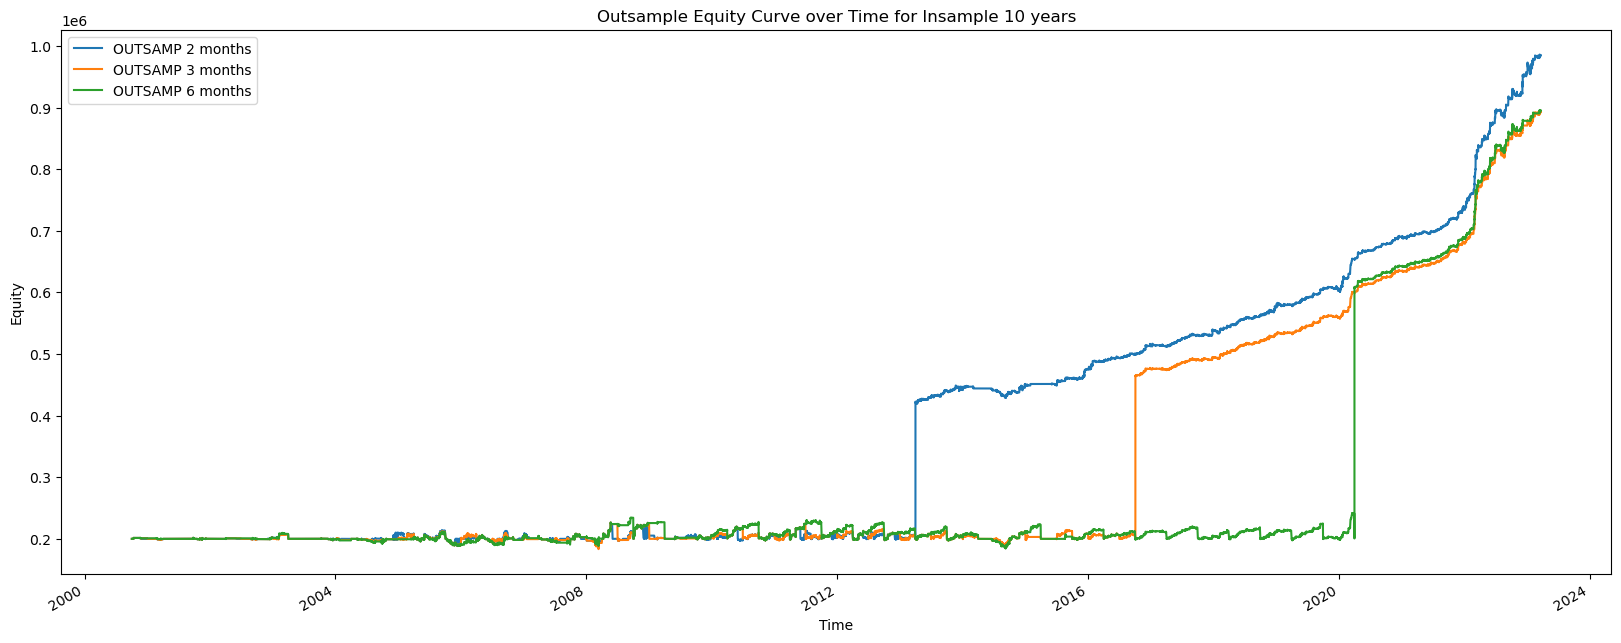

In [7]:


# Mapping of insample years to the relevant outsample identifiers
insample_groups = {
    '1 year': ["HO-5minHLV_INSAMP_1_OUTSAMP_1_", "HO-5minHLV_INSAMP_1_OUTSAMP_2_", "HO-5minHLV_INSAMP_1_OUTSAMP_3_", "HO-5minHLV_INSAMP_1_OUTSAMP_6_"],
    '2 years': ["HO-5minHLV_INSAMP_2_OUTSAMP_1_", "HO-5minHLV_INSAMP_2_OUTSAMP_2_", "HO-5minHLV_INSAMP_2_OUTSAMP_3_", "HO-5minHLV_INSAMP_2_OUTSAMP_6_"],
    '3 years': ["HO-5minHLV_INSAMP_3_OUTSAMP_1_", "HO-5minHLV_INSAMP_3_OUTSAMP_2_", "HO-5minHLV_INSAMP_3_OUTSAMP_3_", "HO-5minHLV_INSAMP_3_OUTSAMP_6_"],
    '4 years': ["HO-5minHLV_INSAMP_4_OUTSAMP_1_", "HO-5minHLV_INSAMP_4_OUTSAMP_2_", "HO-5minHLV_INSAMP_4_OUTSAMP_3_", "HO-5minHLV_INSAMP_4_OUTSAMP_6_"],
    '5 years': ["HO-5minHLV_INSAMP_5_OUTSAMP_1_", "HO-5minHLV_INSAMP_5_OUTSAMP_2_", "HO-5minHLV_INSAMP_5_OUTSAMP_3_", "HO-5minHLV_INSAMP_5_OUTSAMP_6_"],
    '10 years': ["HO-5minHLV_INSAMP_10_OUTSAMP_1_", "HO-5minHLV_INSAMP_10_OUTSAMP_2_", "HO-5minHLV_INSAMP_10_OUTSAMP_3_", "HO-5minHLV_INSAMP_10_OUTSAMP_6_"]}

# Create separate plots for each group
for years, samples in insample_groups.items():
    plt.figure(figsize=(20, 8))
    for sample in samples:
        if sample in dfs_combined:
            dfs_combined[sample]['actual equity'].plot(label=f'{sample.split("_")[3]} {sample.split("_")[4]} months')
    plt.xlabel('Time')
    plt.ylabel('Equity')
    plt.title(f'Outsample Equity Curve over Time for Insample {years}')
    plt.legend()
    plt.show()


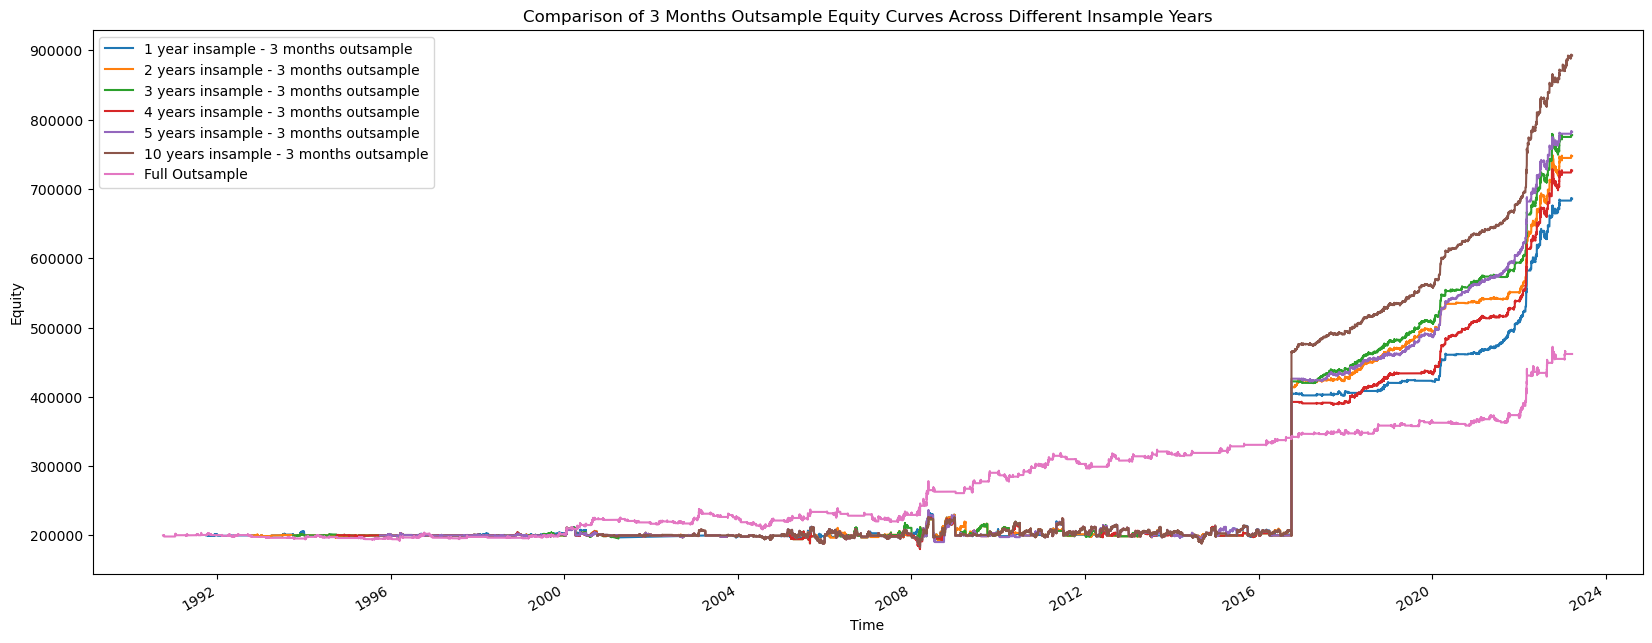

In [68]:
plt.figure(figsize=(20, 8))

# Loop through each group, but only plot '3 months' samples
for years, samples in insample_groups.items():
    for sample in samples:
        if "OUTSAMP_3_" in sample and sample in dfs_combined:
            dfs_combined[sample]['actual equity'].plot(label=f'{years} insample - 3 months outsample')

df_full['actual equity'].plot(label='Full Outsample')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.title('Comparison of 3 Months Outsample Equity Curves Across Different Insample Years')
plt.legend()
plt.show()

In [19]:
import numpy as np

folder_path = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_3_/insample'

file = 'INSAMPLE_START_199701010000_INSAMPLE_END_200001010000.csv'

file_path = f'{folder_path}/{file}'  

df = pd.read_csv(file_path)
    
df['Net Asset to Worst Drawdown'] = df['Equity']/abs(df['MaxDrawdown'])
df['Sharpe Ratio'] = df['DeltaMean']/ df['Std']*np.sqrt(252)                                                               
df[['Chnlen','StpPct','Net Asset to Worst Drawdown','Sharpe Ratio','NumPositiveTrades','Skew','AvgWinner']]


,Chnlen,StpPct,Net Asset to Worst Drawdown,Sharpe Ratio
0,5240,0.005,43.370791,-0.012149
1,7610,0.005,55.270252,0.022454
2,5240,0.006,41.889960,-0.001820
3,2870,0.005,40.117736,-0.022200
4,500,0.005,33.949947,0.059889
...,...,...,...,...
91291,10000,0.096,28.981041,0.147256
91292,10000,0.097,28.679463,0.146808
91293,10000,0.098,28.383980,0.146356
91294,10000,0.099,28.094270,0.145960


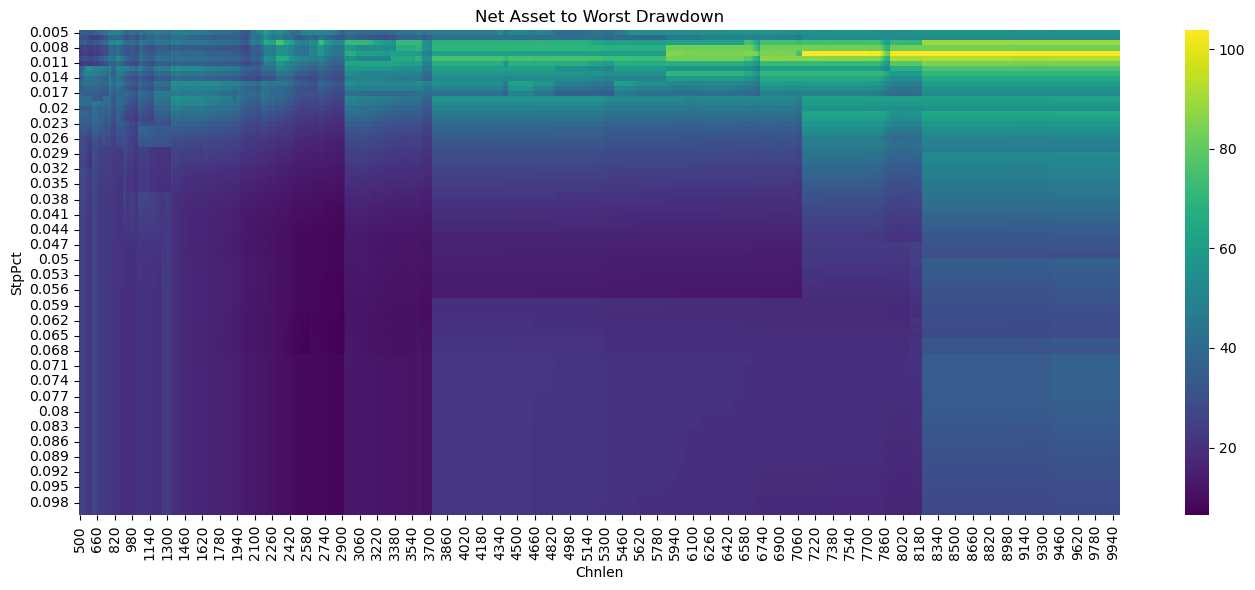

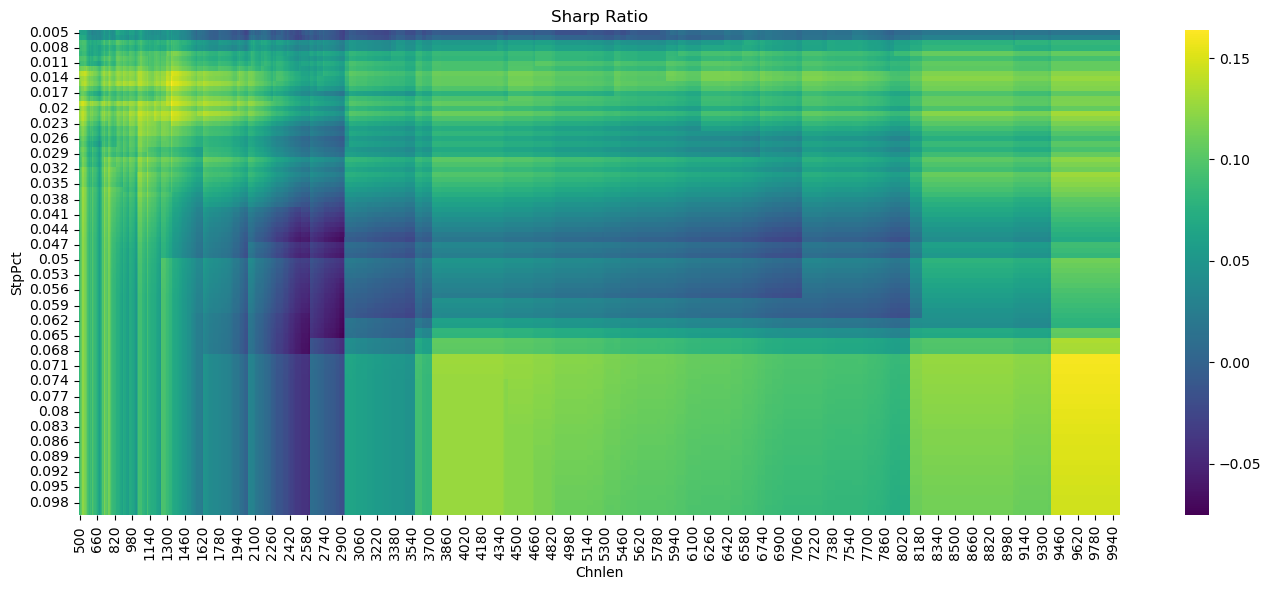

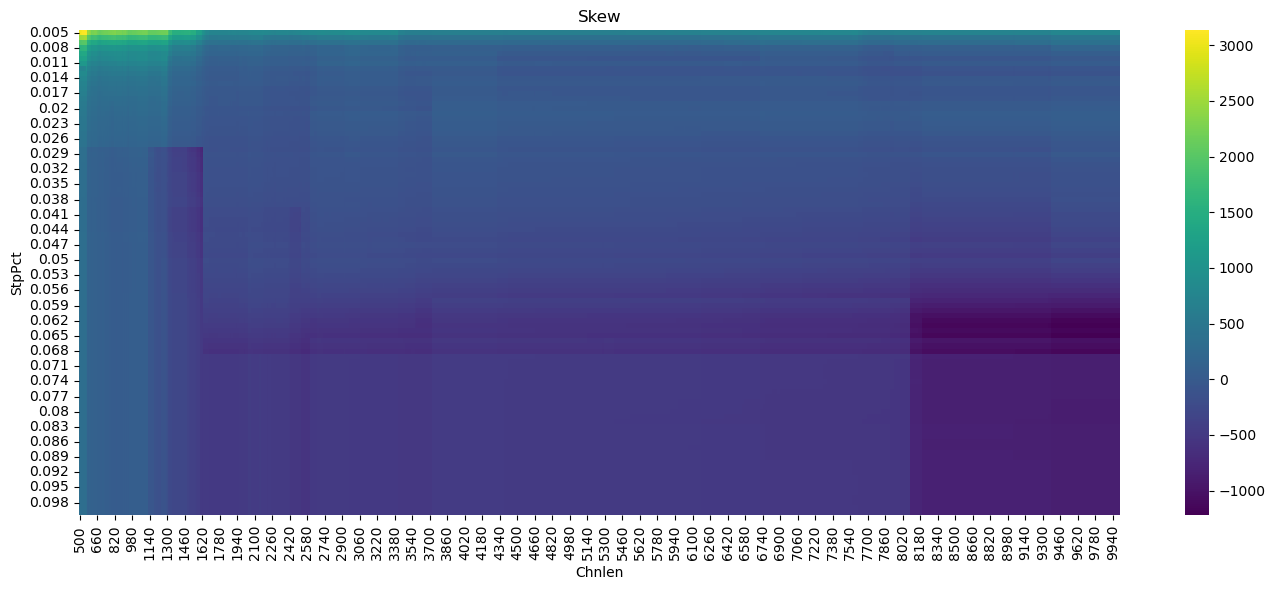

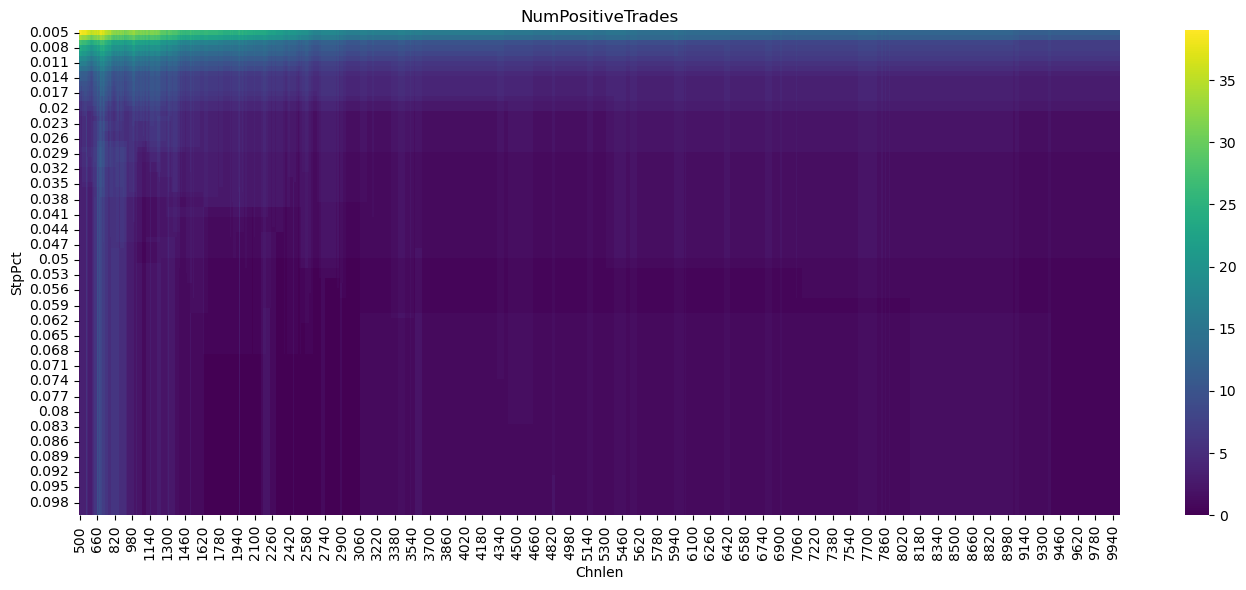

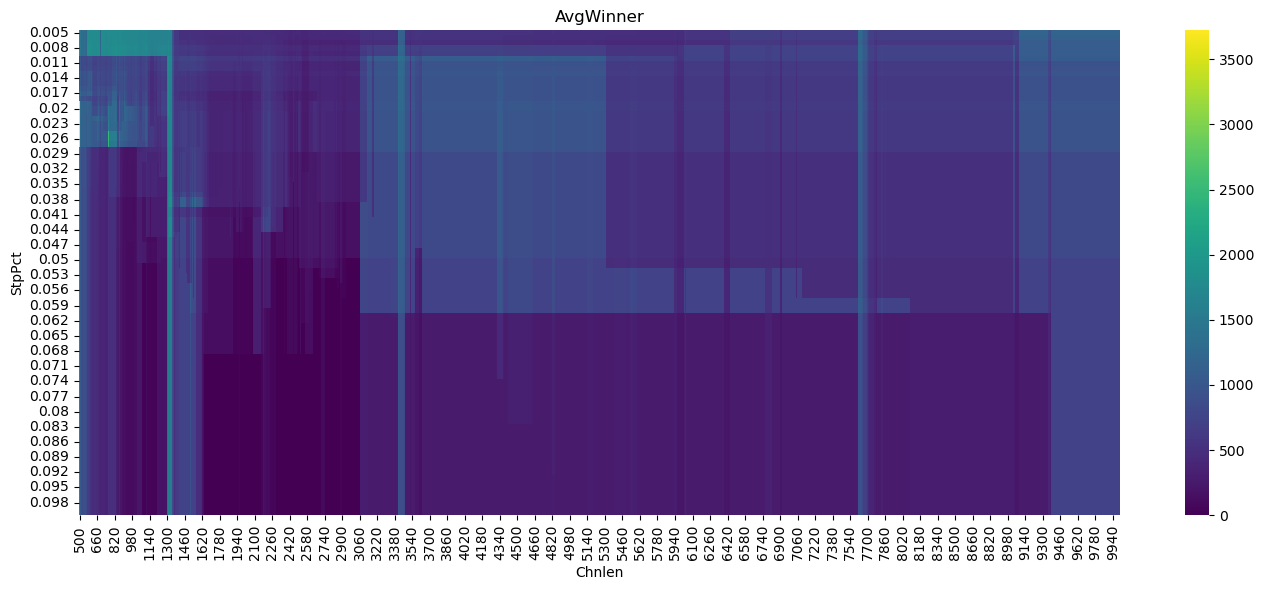

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

net_asset_data = df[['Chnlen', 'StpPct', 'Net Asset to Worst Drawdown']]
sharpe_ratio_data = df[['Chnlen', 'StpPct', 'Sharpe Ratio']]
skew_data = df[['Chnlen', 'StpPct', 'Skew']]
NumPositiveTrades_data = df[['Chnlen', 'StpPct', 'NumPositiveTrades']]
AvgWinner_data = df[['Chnlen', 'StpPct', 'AvgWinner']]

net_asset_pivot = net_asset_data.pivot_table(index="StpPct", columns="Chnlen", values="Net Asset to Worst Drawdown")
sharpe_ratio_pivot = sharpe_ratio_data.pivot_table(index="StpPct", columns="Chnlen", values="Sharpe Ratio")
skew_pivot = skew_data.pivot_table(index="StpPct", columns="Chnlen", values="Skew")
NumPositiveTrades_pivot = NumPositiveTrades_data.pivot_table(index="StpPct", columns="Chnlen", values="NumPositiveTrades")
AvgWinner_pivot = AvgWinner_data.pivot_table(index="StpPct", columns="Chnlen", values="AvgWinner")

cmap = 'viridis'  

plt.figure(figsize=(14, 6))
sns.heatmap(net_asset_pivot, annot=False, cmap=cmap)
plt.title('Net Asset to Worst Drawdown')
plt.xlabel('Chnlen')
plt.ylabel('StpPct')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(sharpe_ratio_pivot, annot=False, cmap=cmap)
plt.title('Sharp Ratio')
plt.xlabel('Chnlen')
plt.ylabel('StpPct')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(skew_pivot, annot=False, cmap=cmap)
plt.title('Skew')
plt.xlabel('Chnlen')
plt.ylabel('StpPct')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(NumPositiveTrades_pivot, annot=False, cmap=cmap)
plt.title('NumPositiveTrades')
plt.xlabel('Chnlen')
plt.ylabel('StpPct')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(AvgWinner_pivot, annot=False, cmap=cmap)
plt.title('AvgWinner')
plt.xlabel('Chnlen')
plt.ylabel('StpPct')
plt.tight_layout()
plt.show()
